<a href="https://colab.research.google.com/github/vyatkinsen/Telecom-labs/blob/main/Lab5_Vyatkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем зависимости



In [42]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

if not os.path.exists('28042__bcjordan__voicedownbew.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/28042__bcjordan__voicedownbew.wav

if not os.path.exists('100475__iluppai__saxophone-weep.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/100475__iluppai__saxophone-weep.wav

if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv

from thinkdsp import decorate, Wave, read_wave

# **Упражнение 5.1**

Блокнот Jupyter этой главы, *chap05.ipynb*, содержит приложение, в котором можно вычислить автокорреляции для различных *lag*. Оцените высоты тона вокального чирпа для нескольких времен начала сегмента.

In [43]:
def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr

def autocorr(wave):
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [44]:
wave = read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()

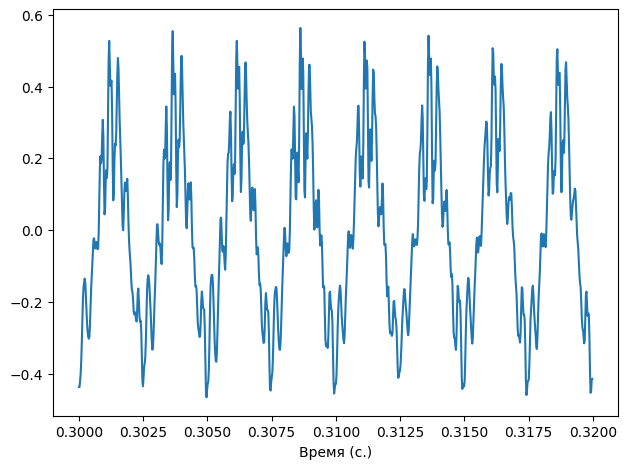

In [45]:
segment = wave.segment(start = 0.3, duration = 0.02)
segment.plot()
decorate(xlabel='Время (с.)')

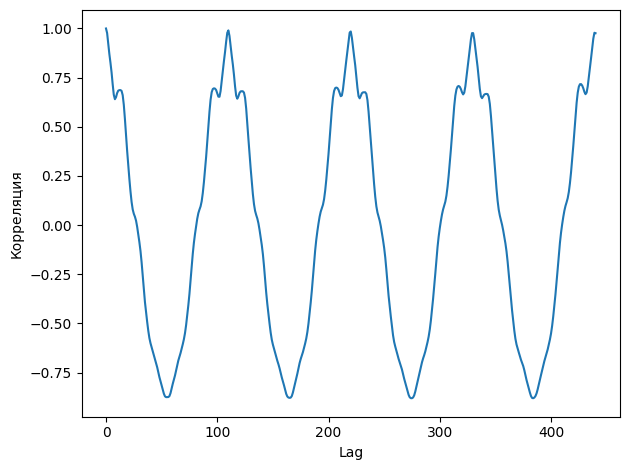

In [46]:
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
decorate(xlabel='Lag', ylabel='Корреляция')

In [47]:
low, high = 90, 110
lag = np.array(corrs[low:high]).argmax() + low
period = lag / segment.framerate
frequency = 1 / period
frequency

404.5871559633028

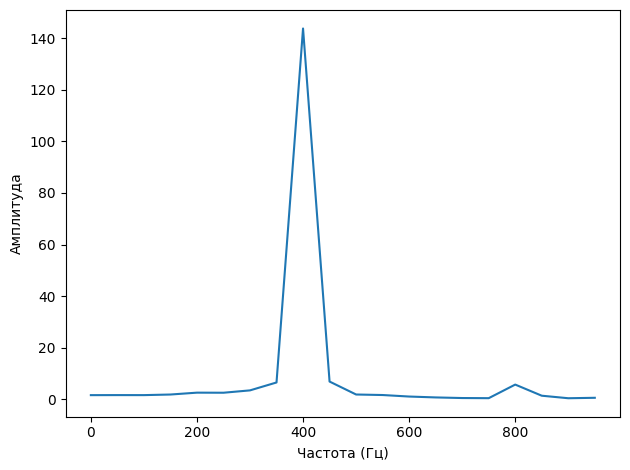

In [48]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)
decorate(xlabel='Частота (Гц)', ylabel='Амплитуда')

Видно, что частота, найденная нами совпала с той, что представлена на спектре.
Попробуем другой сегмент:

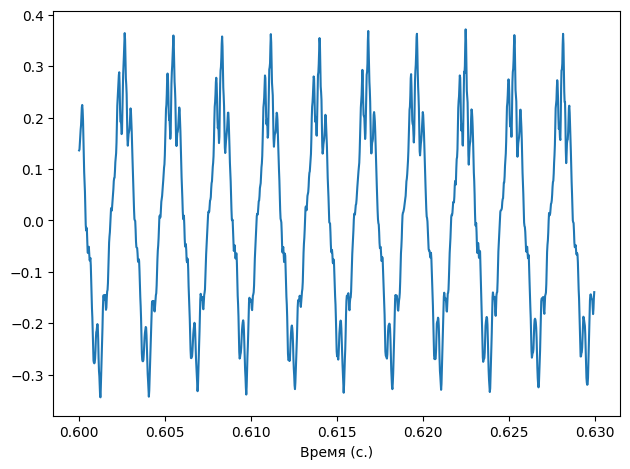

In [49]:
segment = wave.segment(start = 0.6, duration = 0.03)
segment.plot()
decorate(xlabel='Время (с.)')

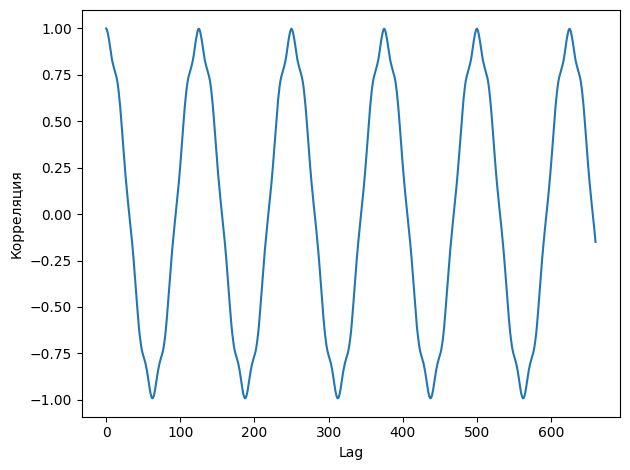

In [50]:
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
decorate(xlabel='Lag', ylabel='Корреляция')

In [51]:
low, high = 100, 120
lag = np.array(corrs[low:high]).argmax() + low
period = lag / segment.framerate
frequency = 1 / period
frequency

370.5882352941176

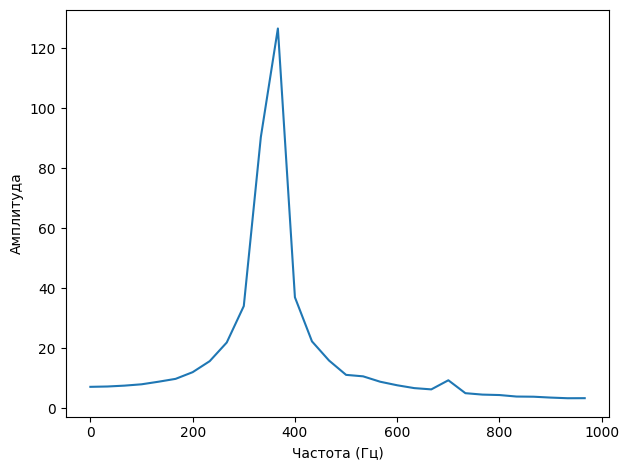

In [52]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)
decorate(xlabel='Частота (Гц)', ylabel='Амплитуда')

И в данном случае удалось корректно определить частоту.

# **Упражнение 5.2**

Пример кода в *chap05.ipynb* показывает, как использовать автокорреляцию для оценки основной частоты периодического сигнала. Инкапсулируйте этот код в функцию, наванную *eastimate_fundamental*, и используйте для отслеживания высоты тона записанного звука.

Проверьте, насколько хорошо она работает, накладывая оценки высоты тона на спектрограмму записи.

In [53]:
wave = read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()

In [54]:
def estimate_fundamental(segment, low=70, high=150):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

Проверим работы функции на спектрограмме раннее используемого звука.

In [55]:
step = 0.02
starts = np.arange(0.0, 1.4, step)

ts = []
freqs = []

for start in starts:
    ts.append(start + step/2)
    segment = wave.segment(start=start, duration=0.02)
    freq = estimate_fundamental(segment)
    freqs.append(freq)

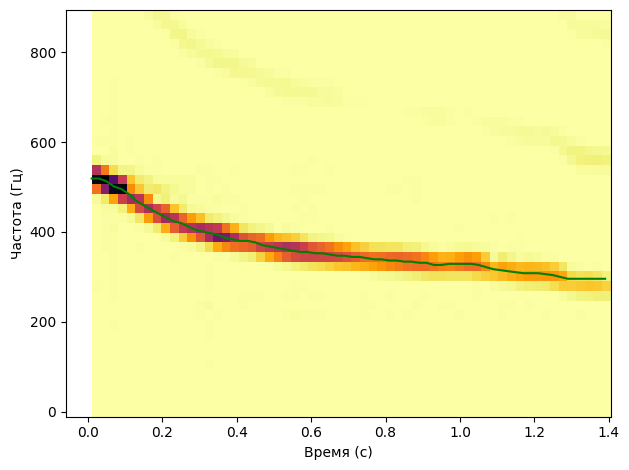

In [56]:
wave.make_spectrogram(2048).plot(high=900)
plt.plot(ts, freqs, color='green')
decorate(xlabel='Время (с)', 
                     ylabel='Частота (Гц)')

Оценки высоты тоная на спектограмме отражены зелёной полосой. Как мы видим, данная функция весьма неплохо оценивает высоту тона, поскольку зеленая полоса совпала со спектограммой.

# **Упражнение 5.3**

Для упражнений в предыдущей главе были нужны исторические цены BitCoin, и надо было оценить спектр мощности изменения цен. Используя те же данные, вычислите автокорреляции цен в платежной системе Bitcoin. Быстро ли спадет авткорреляциионная функция? Есть ли признаки периодичности процесса?

**Ход работы:**

In [57]:
data = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', parse_dates=[0])
data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


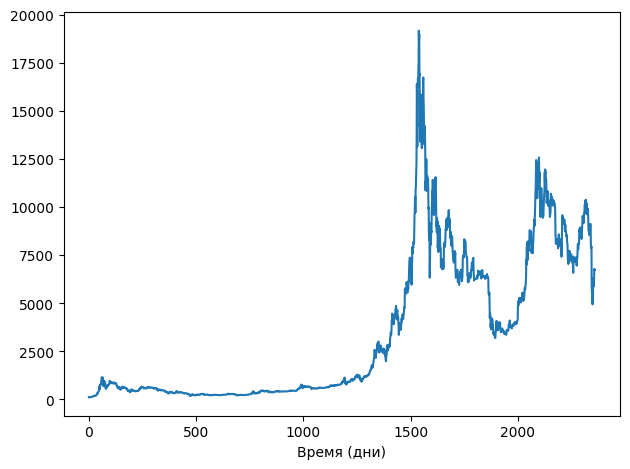

In [58]:
btc_wave = Wave(data['Closing Price (USD)'], data.index, framerate = 1)
btc_wave.plot()
decorate(xlabel='Время (дни)')

Использую функцию *np.correlate* для определения автокорреляционной функции.

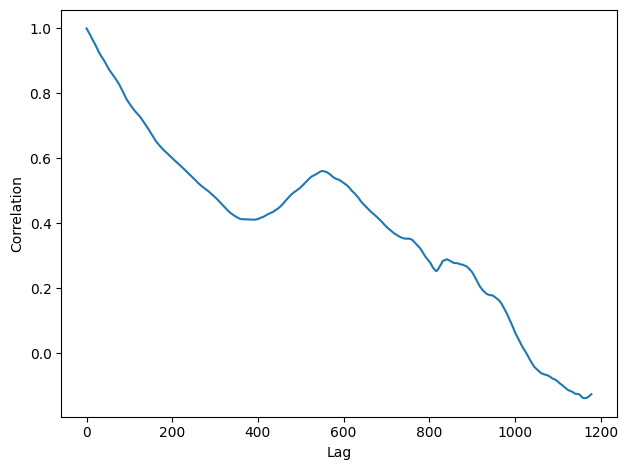

In [59]:
lags, corrs = autocorr(btc_wave)
plt.plot(lags, corrs)
decorate(xlabel='Lag',
         ylabel='Correlation')

График не преиодичный, поскольку имеются резкие и продолжительные падения. Даже если предположить, что цены на биткоин были бы периодичными, тогда бы существовало много спекулянтов. 

# **Упражнение 5.4**

В репозитории этой книги есть блокнот Jupyter под названием *saxophone.ipynb*, в котором исследуются автокорреляция, восприятие высоты тона и явление, называемое *подавленная основная*. Прочтите этот блокнот и "погоняйте" примеры. Выберите другой сегмент записи и вновь поработайте с примерами.

In [60]:
def autocorr(segment):
    corrs = np.correlate(segment.ys, segment.ys, mode='same')
    N = len(corrs)
    lengths = range(N, N//2, -1)

    half = corrs[N//2:].copy()
    half /= lengths
    half /= half[0]
    return half

In [61]:
def find_frequency(corrs, low, high):
    lag = np.array(corrs[low:high]).argmax() + low
    print(lag)
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

In [62]:
wave = read_wave('100475__iluppai__saxophone-weep.wav')
wave.normalize()
wave.make_audio()

In [63]:
segment = wave.segment(start=2.0, duration=0.5)
segment.make_audio()

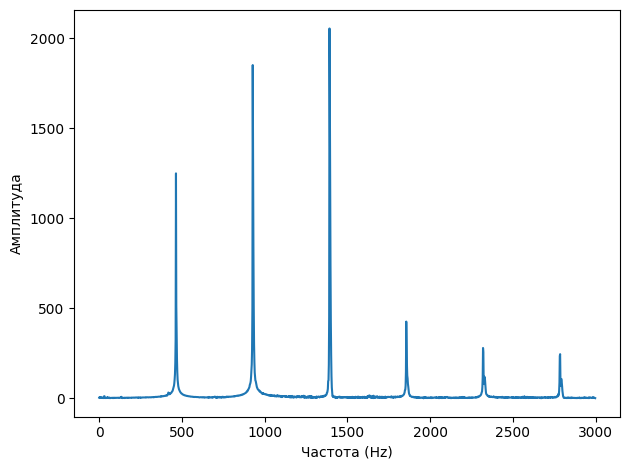

In [64]:
spectrum = segment.make_spectrum()
spectrum.plot(high=3000)
decorate(xlabel='Частота (Hz)', ylabel='Амплитуда')

In [65]:
spectrum.peaks()[:10]

[(2054.0622639591206, 1392.0),
 (1850.8544230639036, 928.0),
 (1684.8468845494765, 1394.0),
 (1332.8150506072802, 930.0),
 (1249.1774991462646, 464.0),
 (1177.6718910227576, 1396.0),
 (857.3729096557305, 932.0),
 (742.841588837269, 1398.0),
 (515.1804113061312, 934.0),
 (513.7226300908811, 466.0)]

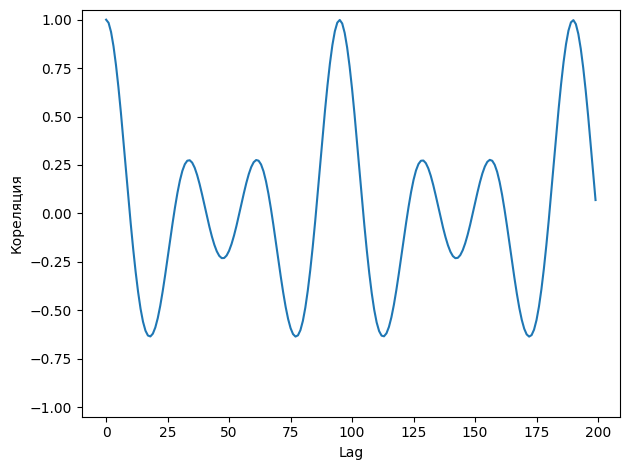

In [66]:
corrs = autocorr(segment)
plt.plot(corrs[:200])
decorate(xlabel='Lag', ylabel='Кореляция', ylim=[-1.05, 1.05])

In [67]:
find_frequency(corrs, 80, 100)

95


464.2105263157895

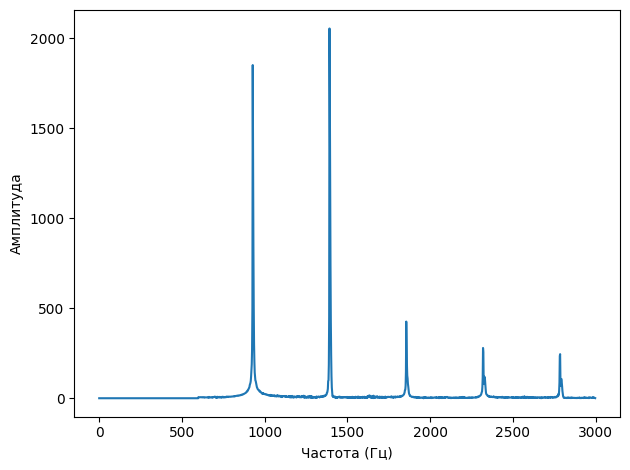

In [68]:
spectrum2 = segment.make_spectrum()
spectrum2.high_pass(600)
spectrum2.plot(high=3000)
decorate(xlabel='Частота (Гц)', ylabel='Амплитуда')

In [69]:
segment2 = spectrum2.make_wave()
segment2.make_audio()

Как мы видим частота в 464 Гц была срезана, однако мы слышим ту же. Связано это с так называемой *подавленной основной*, гармоники основной частоты никуда не делись. Попробуем провернуть такой трюк с другим сегментом.

In [70]:
segment = wave.segment(start=8.0, duration=0.5)
segment.make_audio()

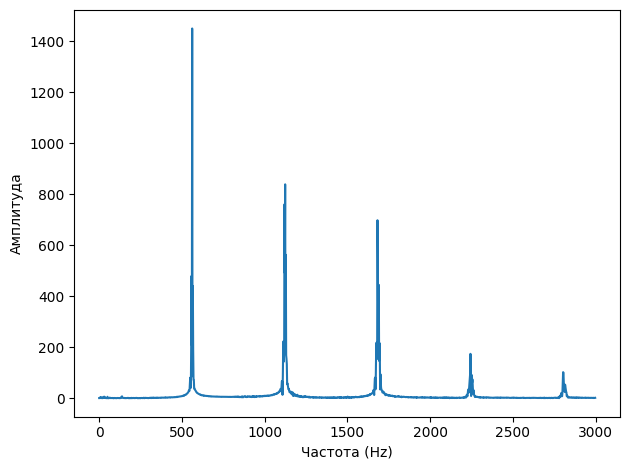

In [71]:
spectrum = segment.make_spectrum()
spectrum.plot(high=3000)
decorate(xlabel='Частота (Hz)', ylabel='Амплитуда')

In [72]:
spectrum.peaks()[:10]

[(1449.7324059418409, 562.0),
 (838.679654994056, 1124.0),
 (760.4866790380277, 1120.0),
 (697.9180739586471, 1682.0),
 (562.4385733324308, 1128.0),
 (548.2317169052268, 1684.0),
 (490.9435713084754, 1122.0),
 (479.5263999004895, 558.0),
 (444.54871419151334, 1690.0),
 (439.8651374537576, 566.0)]

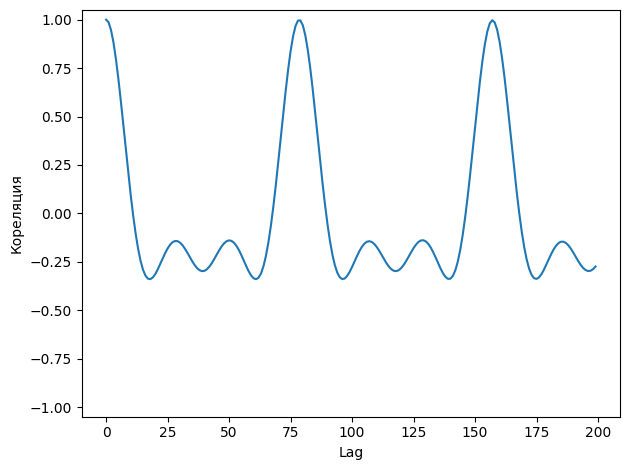

In [73]:
corrs = autocorr(segment)
plt.plot(corrs[:200])
decorate(xlabel='Lag', ylabel='Кореляция', ylim=[-1.05, 1.05])

In [74]:
find_frequency(corrs, 60, 80)

79


558.2278481012657

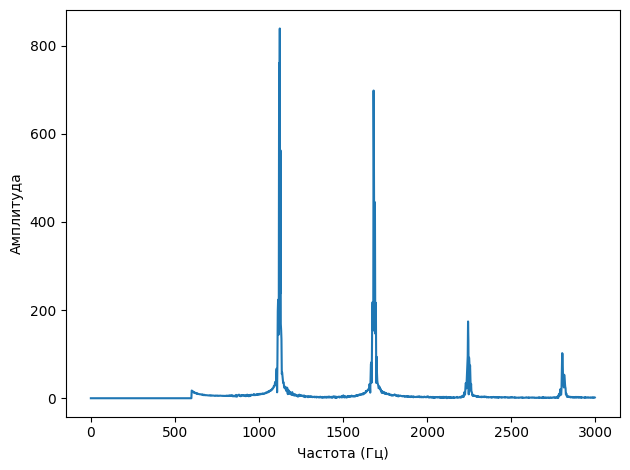

In [75]:
spectrum2 = segment.make_spectrum()
spectrum2.high_pass(600)
spectrum2.plot(high=3000)
decorate(xlabel='Частота (Гц)', ylabel='Амплитуда')

In [76]:
segment2 = spectrum2.make_wave()
segment2.make_audio()